In [3]:
%matplotlib inline
import numpy as np
import scipy as sp
import pandas as pd
from scipy import interpolate
from scipy import stats

import matplotlib.pyplot as plt

```python
R = 40.
H = 60
x_w = 0.
y_w = 60.

f = lambda x,y: - 4.*np.exp( -((x-x_w)**2. + (y-y_w)**2.)/(30.**2.) ) + \
                - 4.*np.exp( -((x+70.)**2. + (y-60.)**2.)/(60.**2.) ) #+ 15.*(y/H)**0.05 
#```

In [47]:
R = 40.
H = 60
x_w = 30.
y_w = 90.
Rw = 20
seed = 1

def f(x,y):
    np.random.seed(seed)
    return - 3.*np.exp( -((x-x_w)**2. + (y-y_w)**2.)/(Rw**2.) ) + \
           - 3.*np.exp( -((x-30)**2. + (y-40)**2.)/(20**2.) ) + \
           - 1.5*np.exp( -((x-np.random.uniform(-60,60))**2. + (y-np.random.uniform(40,70))**2.)/(60.**2.) ) #+ 4.*(y/H)**0.0 
    

## Monte-Carlo integration

In [88]:
x_MC = np.random.uniform(-R,R,9e6)
y_MC = np.random.uniform(-R,R,9e6) + H

r = np.sqrt(x_MC**2. + (y_MC-H)**2.)
ind_in = np.where(r <= R)

u_eq_MC = np.mean(f(x_MC[ind_in],y_MC[ind_in]))
u_eq_MC

-1.8588968000880735

In [89]:
x_mesh,y_mesh = np.meshgrid(np.arange(-50.,100.,0.1),np.arange(0.,120.,0.1))

F = f(x_mesh,y_mesh)

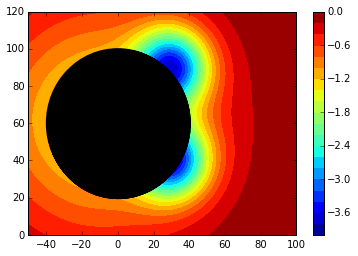

In [90]:
plt.contourf(x_mesh,y_mesh,F,20)
cb = plt.colorbar()
circ = plt.Circle([0.,H],R,ec='k',fill=False)
ax = plt.gca()
ax.add_patch(circ)
plt.plot(x_MC[ind_in],y_MC[ind_in],'.k',alpha=0.005)
x_plot = np.arange(-50.,50.1,0.1)

## Cartessian Gausss-Legendre quadrature

In [91]:
N_x = 5
N_y = 5
root_x_1D, weight_x = np.polynomial.legendre.leggauss(N_x)
root_y_1D, weight_y = np.polynomial.legendre.leggauss(N_y)

In [92]:
root_x,root_y = np.meshgrid(root_x_1D,root_y_1D)
root_x,root_y = root_x.flatten(), root_y.flatten()

In [93]:
print root_x
print root_y
print
print root_x_1D
print root_y_1D
print weight_x
print weight_y

[-0.90617985 -0.53846931  0.          0.53846931  0.90617985 -0.90617985
 -0.53846931  0.          0.53846931  0.90617985 -0.90617985 -0.53846931
  0.          0.53846931  0.90617985 -0.90617985 -0.53846931  0.
  0.53846931  0.90617985 -0.90617985 -0.53846931  0.          0.53846931
  0.90617985]
[-0.90617985 -0.90617985 -0.90617985 -0.90617985 -0.90617985 -0.53846931
 -0.53846931 -0.53846931 -0.53846931 -0.53846931  0.          0.          0.
  0.          0.          0.53846931  0.53846931  0.53846931  0.53846931
  0.53846931  0.90617985  0.90617985  0.90617985  0.90617985  0.90617985]

[-0.90617985 -0.53846931  0.          0.53846931  0.90617985]
[-0.90617985 -0.53846931  0.          0.53846931  0.90617985]
[ 0.23692689  0.47862867  0.56888889  0.47862867  0.23692689]
[ 0.23692689  0.47862867  0.56888889  0.47862867  0.23692689]


In [94]:
y1 = lambda x: np.sqrt(R**2. - x**2.) + H
y2 = lambda x: -np.sqrt(R**2. - x**2.) + H

In [95]:
xi_1D = R*root_x_1D
xi = R*root_x
yij = 0.5*(y1(xi) - y2(xi))*root_y + 0.5*(y1(xi) + y2(xi))
fij = f(xi,yij)

In [96]:
fij.reshape(N_x,N_y)

array([[-1.1431909 , -1.08737332, -1.14347377, -2.75447754, -3.35812501],
       [-1.19913278, -1.30050894, -1.57218152, -3.51629652, -2.88520465],
       [-1.23710927, -1.44595598, -1.60785126, -2.32505993, -2.11623796],
       [-1.21881195, -1.3422547 , -1.57543575, -2.88705016, -2.05717667],
       [-1.174949  , -1.14921649, -1.33259117, -3.41319145, -2.4955946 ]])

In [97]:
np.dot(fij.reshape(N_x,N_y),weight_y)

array([-3.55581225, -4.16754714, -3.51410316, -3.69668423, -3.81144602])

In [98]:
G_xi = 0.5*(y1(xi_1D) - y2(xi_1D)) * np.dot(fij.reshape(N_x,N_y),weight_y)

In [99]:
I = np.dot(R*G_xi,weight_x)/(np.pi*R**2.)
print I
print 100*(I-u_eq_MC)/u_eq_MC, '%'

-1.88090881352
1.18414391972 %


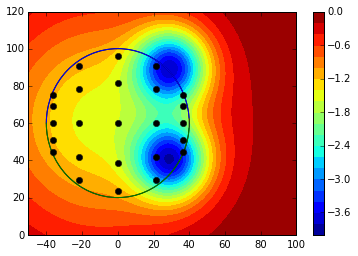

In [100]:
plt.contourf(x_mesh,y_mesh,F,20)
plt.colorbar()

circ = plt.Circle([0.,H],R,ec='k',fill=False)
ax = plt.gca()
ax.add_patch(circ)

x_plot = np.arange(-50.,50.2,0.1)
plt.plot(x_plot,y1(x_plot))
plt.plot(x_plot,y2(x_plot))
plt.plot(xi,yij,'ok')



## integrating before in y 

In [101]:
N_x = 5
N_y = 5
root_x_1D, weight_x = np.polynomial.legendre.leggauss(N_x)
root_y_1D, weight_y = np.polynomial.legendre.leggauss(N_y)

In [102]:
root_x,root_y = np.meshgrid(root_x_1D,root_y_1D)
root_x,root_y = root_x.flatten(), root_y.flatten()

In [103]:
x1 = lambda y: np.sqrt(R**2. - (y-H)**2.)
x2 = lambda y: -np.sqrt(R**2. - (y-H)**2.)

In [104]:
yi_1D = R*root_y_1D+H
yi = R*root_y+H
xij = 0.5*(x1(yi) - x2(yi))*root_x + 0.5*(x1(yi) + x2(yi))
fij = f(xij,yi)

In [105]:
fij.reshape(N_x,N_y)

array([[-1.00846822, -1.04107245, -1.14347377, -1.43142994, -1.74884227],
       [-1.14931915, -1.27775483, -1.57218152, -3.13994237, -3.80353492],
       [-1.23710927, -1.44595598, -1.60785126, -2.32505993, -2.11623796],
       [-1.19440144, -1.32625261, -1.57543575, -2.87260182, -3.39835154],
       [-1.08228911, -1.13412714, -1.33259117, -1.88585944, -2.48931432]])

In [106]:
G_yi = 0.5*(x1(yi_1D) - x2(yi_1D)) * np.dot(weight_x,fij.reshape(N_x,N_y))

In [107]:
I = np.dot(R*G_yi,weight_y)/(np.pi*R**2.)
print I
print 100*(I-u_eq_MC)/u_eq_MC, '%'

-1.77097460707
-4.72980495819 %


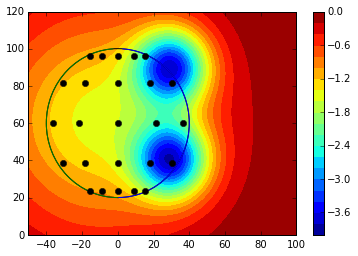

In [108]:
plt.contourf(x_mesh,y_mesh,F,20)
plt.colorbar()

circ = plt.Circle([0.,H],R,ec='k',fill=False)
ax = plt.gca()
ax.add_patch(circ)

y_plot = np.arange(-50.,50.2,0.1)+H
plt.plot(x1(y_plot),y_plot)
plt.plot(x2(y_plot),y_plot)
plt.plot(xij,yi,'ok')


# Radial Gauss-Leg

In [109]:
f_r = lambda r,th: f(-r*np.sin(th),r*np.cos(th)+H)

In [132]:
def gaussN(R, func, varargin, NGr=4, NGth=4):
    """Calculate numerically the gauss integration.
    [1] eq. 38

    Inputs
    ----------
    R (float): Wind turbine radius [m]
    func (function): Wind speed function
    varargin: Other arguments for the function besides [r,te]
    NG (int): Number of Ga

    Outputs
    ----------
    Ua (float):
    """
    A = np.pi*R**2
    #coefficients
    if  (NGr==4)&(NGth==4): #for speed give the full values
        rt = np.array([[ -0.339981043584856, -0.861136311594053,
            0.339981043584856, 0.861136311594053]])
        te = rt.T
        w = np.array([[0.652145154862546, 0.347854845137454,
            0.652145154862546, 0.347854845137454]])
        wt=w
    else:
        rt,w = np.polynomial.legendre.leggauss(NGr)
        rt = np.array([rt])
        #te = rt.T
        w = np.array([w])
        te,wt = np.polynomial.legendre.leggauss(NGr)
        te = np.array([te]).T
        wt = np.array([wt])
        
    return np.sum((np.pi/4.0)*(R**2./A)*w*wt.T*func(R*(rt+1.0)/2.0,
        np.pi*(te+1.0),*varargin)*(rt+1.0))

In [133]:
N_r = 4
N_th = 4
I = gaussN(R,f_r,[],N_r,N_th)
print I
print 100*(I-u_eq_MC)/u_eq_MC, '%'

-2.10872137547
13.4393999373 %


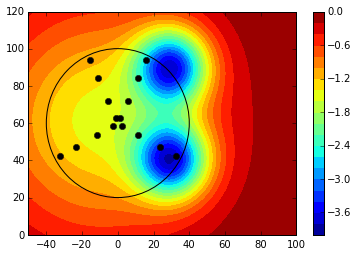

In [124]:
plt.contourf(x_mesh,y_mesh,F,20)
plt.colorbar()

circ = plt.Circle([0.,H],R,ec='k',fill=False)
ax = plt.gca()
ax.add_patch(circ)


rt,w = np.polynomial.legendre.leggauss(N_r)
rt = np.array([rt])
te,wt = np.polynomial.legendre.leggauss(N_th)
te = np.array([te])
re = R*(rt+1.0)/2.0
te = np.pi*(te.T+1.0)
plt.plot(-re*np.sin(te),re*np.cos(te)+H,'ok')

